## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9602003	total: 58.1ms	remaining: 58s
1:	learn: 0.9443835	total: 59ms	remaining: 29.4s
2:	learn: 0.9246671	total: 59.9ms	remaining: 19.9s
3:	learn: 0.9095674	total: 61ms	remaining: 15.2s
4:	learn: 0.8918109	total: 61.9ms	remaining: 12.3s
5:	learn: 0.8775758	total: 62.7ms	remaining: 10.4s
6:	learn: 0.8643594	total: 63.7ms	remaining: 9.03s
7:	learn: 0.8480820	total: 64.5ms	remaining: 8s
8:	learn: 0.8341433	total: 65.2ms	remaining: 7.18s
9:	learn: 0.8185264	total: 66ms	remaining: 6.54s
10:	learn: 0.8043539	total: 66.8ms	remaining: 6.01s
11:	learn: 0.7923312	total: 68.3ms	remaining: 5.62s
12:	learn: 0.7800867	total: 69.2ms	remaining: 5.25s
13:	learn: 0.7663415	total: 70ms	remaining: 4.93s
14:	learn: 0.7550754	total: 70.7ms	remaining: 4.64s
15:	learn: 0.7406621	total: 71.6ms	remaining: 4.41s
16:	learn: 0.7299235	total: 72.5ms	remaining: 4.19s
17:	learn: 0.7175793	total: 73.3ms	remaining: 4s
18:	learn: 0.7060775	total: 74.1ms	remaining: 3.82s
19:	lear

61:	learn: 0.4156468	total: 110ms	remaining: 1.66s
62:	learn: 0.4117026	total: 110ms	remaining: 1.64s
63:	learn: 0.4079608	total: 111ms	remaining: 1.63s
64:	learn: 0.4051219	total: 112ms	remaining: 1.61s
65:	learn: 0.4004428	total: 113ms	remaining: 1.6s
66:	learn: 0.3974509	total: 114ms	remaining: 1.59s
67:	learn: 0.3945880	total: 115ms	remaining: 1.57s
68:	learn: 0.3918640	total: 116ms	remaining: 1.56s
69:	learn: 0.3888933	total: 116ms	remaining: 1.55s
70:	learn: 0.3860695	total: 118ms	remaining: 1.54s
71:	learn: 0.3820181	total: 119ms	remaining: 1.53s
72:	learn: 0.3801180	total: 119ms	remaining: 1.51s
73:	learn: 0.3769936	total: 120ms	remaining: 1.5s
74:	learn: 0.3745083	total: 121ms	remaining: 1.49s
75:	learn: 0.3725717	total: 122ms	remaining: 1.48s
76:	learn: 0.3689930	total: 123ms	remaining: 1.47s
77:	learn: 0.3667419	total: 124ms	remaining: 1.46s
78:	learn: 0.3646824	total: 125ms	remaining: 1.45s
79:	learn: 0.3622929	total: 125ms	remaining: 1.44s
80:	learn: 0.3597361	total: 126ms

158:	learn: 0.2520539	total: 192ms	remaining: 1.01s
159:	learn: 0.2513216	total: 193ms	remaining: 1.01s
160:	learn: 0.2505710	total: 193ms	remaining: 1.01s
161:	learn: 0.2494334	total: 194ms	remaining: 1s
162:	learn: 0.2482608	total: 195ms	remaining: 1s
163:	learn: 0.2474587	total: 196ms	remaining: 999ms
164:	learn: 0.2469927	total: 197ms	remaining: 996ms
165:	learn: 0.2462446	total: 198ms	remaining: 993ms
166:	learn: 0.2456190	total: 198ms	remaining: 990ms
167:	learn: 0.2444956	total: 199ms	remaining: 987ms
168:	learn: 0.2438962	total: 200ms	remaining: 983ms
169:	learn: 0.2432602	total: 201ms	remaining: 980ms
170:	learn: 0.2425983	total: 201ms	remaining: 977ms
171:	learn: 0.2421072	total: 202ms	remaining: 974ms
172:	learn: 0.2414332	total: 203ms	remaining: 971ms
173:	learn: 0.2407278	total: 204ms	remaining: 968ms
174:	learn: 0.2400324	total: 205ms	remaining: 965ms
175:	learn: 0.2393957	total: 205ms	remaining: 962ms
176:	learn: 0.2387817	total: 206ms	remaining: 959ms
177:	learn: 0.2382

289:	learn: 0.1819641	total: 299ms	remaining: 733ms
290:	learn: 0.1815854	total: 300ms	remaining: 732ms
291:	learn: 0.1812444	total: 302ms	remaining: 731ms
292:	learn: 0.1808374	total: 303ms	remaining: 730ms
293:	learn: 0.1805431	total: 304ms	remaining: 729ms
294:	learn: 0.1802226	total: 305ms	remaining: 729ms
295:	learn: 0.1799748	total: 306ms	remaining: 727ms
296:	learn: 0.1797313	total: 307ms	remaining: 726ms
297:	learn: 0.1795322	total: 308ms	remaining: 725ms
298:	learn: 0.1793083	total: 309ms	remaining: 723ms
299:	learn: 0.1789790	total: 309ms	remaining: 722ms
300:	learn: 0.1787873	total: 310ms	remaining: 721ms
301:	learn: 0.1783528	total: 311ms	remaining: 719ms
302:	learn: 0.1778629	total: 312ms	remaining: 717ms
303:	learn: 0.1776879	total: 313ms	remaining: 716ms
304:	learn: 0.1772030	total: 313ms	remaining: 714ms
305:	learn: 0.1766571	total: 314ms	remaining: 713ms
306:	learn: 0.1763500	total: 315ms	remaining: 711ms
307:	learn: 0.1761496	total: 316ms	remaining: 710ms
308:	learn: 

385:	learn: 0.1578229	total: 382ms	remaining: 607ms
386:	learn: 0.1576034	total: 383ms	remaining: 606ms
387:	learn: 0.1571105	total: 384ms	remaining: 605ms
388:	learn: 0.1569976	total: 385ms	remaining: 604ms
389:	learn: 0.1569536	total: 385ms	remaining: 603ms
390:	learn: 0.1568051	total: 386ms	remaining: 602ms
391:	learn: 0.1564207	total: 387ms	remaining: 600ms
392:	learn: 0.1563860	total: 388ms	remaining: 599ms
393:	learn: 0.1562592	total: 389ms	remaining: 598ms
394:	learn: 0.1562282	total: 389ms	remaining: 597ms
395:	learn: 0.1559835	total: 390ms	remaining: 595ms
396:	learn: 0.1557380	total: 391ms	remaining: 594ms
397:	learn: 0.1557142	total: 392ms	remaining: 593ms
398:	learn: 0.1552255	total: 393ms	remaining: 591ms
399:	learn: 0.1550052	total: 393ms	remaining: 590ms
400:	learn: 0.1548476	total: 394ms	remaining: 589ms
401:	learn: 0.1545014	total: 395ms	remaining: 588ms
402:	learn: 0.1541583	total: 396ms	remaining: 587ms
403:	learn: 0.1538960	total: 397ms	remaining: 586ms
404:	learn: 

514:	learn: 0.1277895	total: 490ms	remaining: 462ms
515:	learn: 0.1275458	total: 491ms	remaining: 461ms
516:	learn: 0.1271790	total: 492ms	remaining: 460ms
517:	learn: 0.1270786	total: 493ms	remaining: 459ms
518:	learn: 0.1267004	total: 494ms	remaining: 458ms
519:	learn: 0.1266658	total: 495ms	remaining: 457ms
520:	learn: 0.1265796	total: 496ms	remaining: 456ms
521:	learn: 0.1263465	total: 496ms	remaining: 454ms
522:	learn: 0.1260566	total: 497ms	remaining: 453ms
523:	learn: 0.1257101	total: 498ms	remaining: 452ms
524:	learn: 0.1255861	total: 499ms	remaining: 451ms
525:	learn: 0.1254182	total: 500ms	remaining: 450ms
526:	learn: 0.1251508	total: 500ms	remaining: 449ms
527:	learn: 0.1250486	total: 501ms	remaining: 448ms
528:	learn: 0.1247146	total: 502ms	remaining: 447ms
529:	learn: 0.1244906	total: 503ms	remaining: 446ms
530:	learn: 0.1242186	total: 504ms	remaining: 445ms
531:	learn: 0.1238118	total: 505ms	remaining: 444ms
532:	learn: 0.1237544	total: 506ms	remaining: 443ms
533:	learn: 

611:	learn: 0.1101058	total: 572ms	remaining: 363ms
612:	learn: 0.1098878	total: 573ms	remaining: 362ms
613:	learn: 0.1095988	total: 574ms	remaining: 361ms
614:	learn: 0.1094959	total: 575ms	remaining: 360ms
615:	learn: 0.1091890	total: 576ms	remaining: 359ms
616:	learn: 0.1090778	total: 577ms	remaining: 358ms
617:	learn: 0.1089070	total: 577ms	remaining: 357ms
618:	learn: 0.1086992	total: 578ms	remaining: 356ms
619:	learn: 0.1086837	total: 579ms	remaining: 355ms
620:	learn: 0.1086199	total: 580ms	remaining: 354ms
621:	learn: 0.1084857	total: 581ms	remaining: 353ms
622:	learn: 0.1083421	total: 582ms	remaining: 352ms
623:	learn: 0.1083261	total: 582ms	remaining: 351ms
624:	learn: 0.1081670	total: 583ms	remaining: 350ms
625:	learn: 0.1078900	total: 584ms	remaining: 349ms
626:	learn: 0.1077472	total: 585ms	remaining: 348ms
627:	learn: 0.1075382	total: 586ms	remaining: 347ms
628:	learn: 0.1073658	total: 587ms	remaining: 346ms
629:	learn: 0.1072379	total: 587ms	remaining: 345ms
630:	learn: 

742:	learn: 0.0903753	total: 680ms	remaining: 235ms
743:	learn: 0.0902503	total: 681ms	remaining: 234ms
744:	learn: 0.0901339	total: 682ms	remaining: 233ms
745:	learn: 0.0901015	total: 683ms	remaining: 233ms
746:	learn: 0.0899583	total: 684ms	remaining: 232ms
747:	learn: 0.0898229	total: 685ms	remaining: 231ms
748:	learn: 0.0896572	total: 685ms	remaining: 230ms
749:	learn: 0.0894530	total: 686ms	remaining: 229ms
750:	learn: 0.0893488	total: 687ms	remaining: 228ms
751:	learn: 0.0891603	total: 688ms	remaining: 227ms
752:	learn: 0.0890204	total: 689ms	remaining: 226ms
753:	learn: 0.0888231	total: 690ms	remaining: 225ms
754:	learn: 0.0886895	total: 690ms	remaining: 224ms
755:	learn: 0.0885621	total: 691ms	remaining: 223ms
756:	learn: 0.0884050	total: 692ms	remaining: 222ms
757:	learn: 0.0882078	total: 693ms	remaining: 221ms
758:	learn: 0.0881375	total: 693ms	remaining: 220ms
759:	learn: 0.0880339	total: 694ms	remaining: 219ms
760:	learn: 0.0878957	total: 695ms	remaining: 218ms
761:	learn: 

840:	learn: 0.0785345	total: 762ms	remaining: 144ms
841:	learn: 0.0783769	total: 763ms	remaining: 143ms
842:	learn: 0.0781739	total: 764ms	remaining: 142ms
843:	learn: 0.0780613	total: 765ms	remaining: 141ms
844:	learn: 0.0779161	total: 766ms	remaining: 141ms
845:	learn: 0.0778987	total: 767ms	remaining: 140ms
846:	learn: 0.0777883	total: 768ms	remaining: 139ms
847:	learn: 0.0776829	total: 769ms	remaining: 138ms
848:	learn: 0.0775378	total: 770ms	remaining: 137ms
849:	learn: 0.0773876	total: 771ms	remaining: 136ms
850:	learn: 0.0773095	total: 771ms	remaining: 135ms
851:	learn: 0.0771500	total: 772ms	remaining: 134ms
852:	learn: 0.0770265	total: 773ms	remaining: 133ms
853:	learn: 0.0769759	total: 774ms	remaining: 132ms
854:	learn: 0.0768105	total: 775ms	remaining: 131ms
855:	learn: 0.0767545	total: 776ms	remaining: 131ms
856:	learn: 0.0767120	total: 777ms	remaining: 130ms
857:	learn: 0.0765621	total: 777ms	remaining: 129ms
858:	learn: 0.0764543	total: 778ms	remaining: 128ms
859:	learn: 

968:	learn: 0.0653133	total: 871ms	remaining: 27.9ms
969:	learn: 0.0652089	total: 872ms	remaining: 27ms
970:	learn: 0.0651164	total: 872ms	remaining: 26.1ms
971:	learn: 0.0650446	total: 873ms	remaining: 25.2ms
972:	learn: 0.0649728	total: 874ms	remaining: 24.3ms
973:	learn: 0.0648808	total: 875ms	remaining: 23.4ms
974:	learn: 0.0647847	total: 876ms	remaining: 22.5ms
975:	learn: 0.0647465	total: 877ms	remaining: 21.6ms
976:	learn: 0.0646534	total: 878ms	remaining: 20.7ms
977:	learn: 0.0645614	total: 878ms	remaining: 19.8ms
978:	learn: 0.0644660	total: 879ms	remaining: 18.9ms
979:	learn: 0.0643211	total: 880ms	remaining: 18ms
980:	learn: 0.0642423	total: 881ms	remaining: 17.1ms
981:	learn: 0.0641829	total: 882ms	remaining: 16.2ms
982:	learn: 0.0640362	total: 883ms	remaining: 15.3ms
983:	learn: 0.0639393	total: 884ms	remaining: 14.4ms
984:	learn: 0.0638517	total: 884ms	remaining: 13.5ms
985:	learn: 0.0637662	total: 885ms	remaining: 12.6ms
986:	learn: 0.0636365	total: 886ms	remaining: 11.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

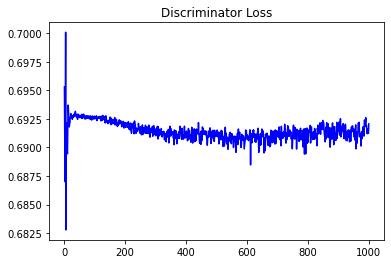

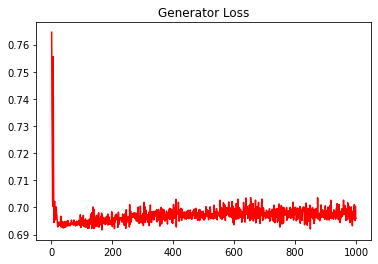

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16242359353697194


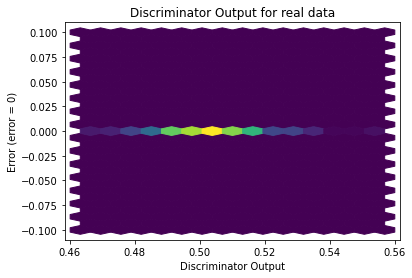

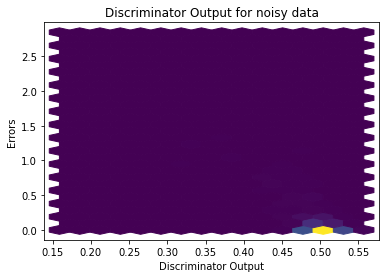

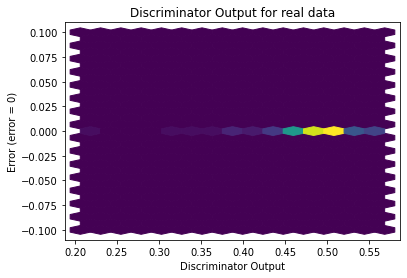

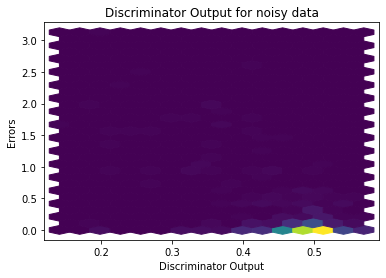

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


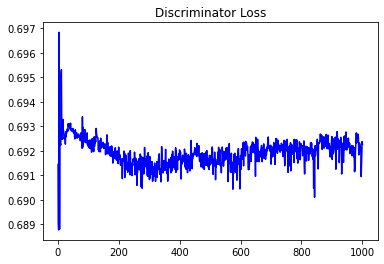

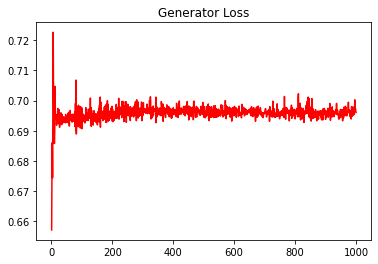

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1378119687981455


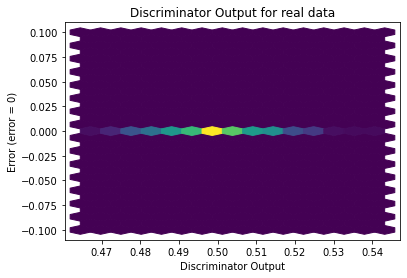

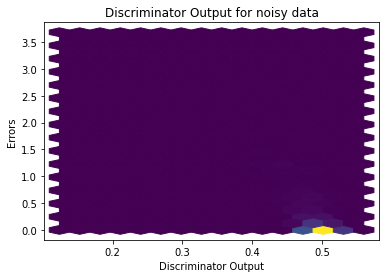

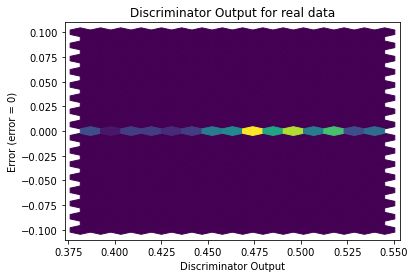

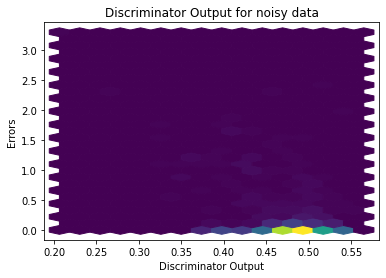

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9868]], requires_grad=True)
